In [1]:
import os 

import pandas as pd
import numpy as np
import glob

In [2]:
print(os.getcwd())
%cd ../../..

/Users/elizagoler/Documents/RecessionFertility/source/derived/county_gfrs
/Users/elizagoler/Documents/RecessionFertility


## From 2003 onwards, CDC Wonder has annual county-level fertility rates. I use those directly. ##

Read in data from 2007-2012

In [194]:
frates_2007_12 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_2007-2012.csv')

Clean data types and remove decimal points on county codes and years:

In [195]:
#frates_2007_12.dtypes
frates_2007_12['County Code'] = frates_2007_12['County Code'].astype(str).str.replace(r'\.0$', '', regex=True)
frates_2007_12['Year'] = frates_2007_12['Year'].astype(str).str.replace(r'\.0$', '', regex=True)

In [196]:
frates_2007_12.head()

,Notes,County,County Code,Year,Year Code,Births,Total Population,Birth Rate,Female Population,Fertility Rate
0,NaN,"Baldwin County, AL",1003,2007,2007.0,2281.0,172404.0,13.23,31772.0,71.79
1,NaN,"Baldwin County, AL",1003,2008,2008.0,2289.0,175827.0,13.02,32118.0,71.27
2,NaN,"Baldwin County, AL",1003,2009,2009.0,2125.0,179406.0,11.84,32356.0,65.68
3,NaN,"Baldwin County, AL",1003,2010,2010.0,2167.0,182265.0,11.89,32715.0,66.24
4,NaN,"Baldwin County, AL",1003,2011,2011.0,2157.0,186717.0,11.55,33387.0,64.61


Read in data file for 2003-2006:

In [197]:
frates_2003_06 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_2003-2006.csv')

Do the same cleaning here as I did above:

In [198]:
frates_2003_06['County Code'] = frates_2003_06['County Code'].astype(str).str.replace(r'\.0$', '', regex=True)
frates_2003_06['Year'] = frates_2003_06['Year'].astype(str).str.replace(r'\.0$', '', regex=True)

Concatenate the 2003-2012 data:

In [199]:
frates_2003_12 = pd.concat([frates_2003_06, frates_2007_12])

In [200]:
frates_2003_12.head()

,Notes,County,County Code,Year,Year Code,Births,Total Population,Birth Rate,Female Population,Fertility Rate
0,NaN,"Baldwin County, AL",1003,2003,2003.0,1860.0,151509.0,12.28,28759.0,64.68
1,NaN,"Baldwin County, AL",1003,2004,2004.0,1872.0,156266.0,11.98,29331.0,63.82
2,NaN,"Baldwin County, AL",1003,2005,2005.0,2099.0,162183.0,12.94,30201.0,69.50
3,NaN,"Baldwin County, AL",1003,2006,2006.0,2245.0,168121.0,13.35,31071.0,72.25
4,Total,"Baldwin County, AL",1003,nan,NaN,8076.0,638079.0,12.66,119362.0,67.66


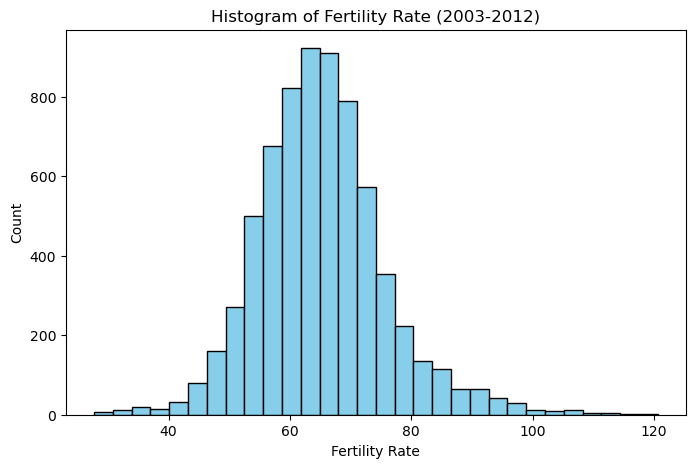

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(frates_2003_12['Fertility Rate'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fertility Rate (2003-2012)')
plt.xlabel('Fertility Rate')
plt.ylabel('Count')
plt.show()


## For 1995 to 2002, I use the annual count of births by county from CDC Wonder (numerator). I use SEER data to get the population of women ages 15-44 (denominator). ##

In [203]:
birth_counts_1995_2002 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_1995-2002.csv')

In [204]:
birth_counts_1995_2002.head()

,Notes,County,County Code,Year,Year Code,Births
0,NaN,"Calhoun County, AL",1015.0,1995.0,1995.0,1520.0
1,NaN,"Calhoun County, AL",1015.0,1996.0,1996.0,1632.0
2,NaN,"Calhoun County, AL",1015.0,1997.0,1997.0,1588.0
3,NaN,"Calhoun County, AL",1015.0,1998.0,1998.0,1657.0
4,NaN,"Calhoun County, AL",1015.0,1999.0,1999.0,1586.0


In [205]:
# 1. Drop 'Year Code' column
if 'Year Code' in birth_counts_1995_2002.columns:
    birth_counts_1995_2002 = birth_counts_1995_2002.drop(columns=['Year Code'])

# 2. Remove '.0' from 'County Code' and 'Year' columns
for col in ['County Code', 'Year']:
    birth_counts_1995_2002[col] = (
        birth_counts_1995_2002[col]
        .astype(str)
        .str.replace(r'\.0$', '', regex=True)
    )

# 3. Clean 'Births': set missing, convert to int (no decimals)
# First, turn to str and identify missing
births_col = (
    birth_counts_1995_2002['Births']
    .astype(str)
    .replace(['nan', 'NaN', '', 'None'], pd.NA)
)
# Remove ".0", then convert
births_col = births_col.mask(births_col.isna(), None).str.replace(r'\.0$', '', regex=True)
# Convert to Int64 to allow NA, ensuring no decimals displayed
birth_counts_1995_2002['Births'] = pd.to_numeric(births_col, errors='coerce').astype('Int64')

# 4. Ensure correct dtypes for County Code and Year
birth_counts_1995_2002['County Code'] = birth_counts_1995_2002['County Code'].astype(str)
birth_counts_1995_2002['Year'] = birth_counts_1995_2002['Year'].astype(str)


In [206]:
birth_counts_1995_2002.head()

,Notes,County,County Code,Year,Births
0,NaN,"Calhoun County, AL",1015,1995,1520
1,NaN,"Calhoun County, AL",1015,1996,1632
2,NaN,"Calhoun County, AL",1015,1997,1588
3,NaN,"Calhoun County, AL",1015,1998,1657
4,NaN,"Calhoun County, AL",1015,1999,1586


In [207]:
birth_counts_1995_2002.dtypes

Notes          object
County         object
County Code    object
Year           object
Births          Int64
dtype: object

In [208]:
# Print one representative row for each state (state = last two letters of "County")
four_digit_rows = birth_counts_1995_2002[birth_counts_1995_2002['County Code'].str.len() == 4].copy()
four_digit_rows['State'] = four_digit_rows['County'].str[-2:]
print(four_digit_rows.groupby('State', as_index=False).head(1))


    Notes                 County County Code  Year  Births State
0     NaN     Calhoun County, AL        1015  1995    1520    AL
65    NaN  Anchorage Borough, AK        2020  1995    4453    AK
81    NaN    Maricopa County, AZ        4013  1995   44053    AZ
129   NaN     Pulaski County, AR        5119  1995    5636    AR
153   NaN     Alameda County, CA        6001  1995   20960    CA
433   NaN       Adams County, CO        8001  1995    4861    CO
513   NaN   Fairfield County, CT        9001  1995   12203    CT


Seems like the four digit county codes are missing a zero at the beginning

In [209]:
# Pad County Code with leading zero if it is four digits
birth_counts_1995_2002.loc[
    birth_counts_1995_2002['County Code'].str.len() == 4, 'County Code'
] = (
    '0' + birth_counts_1995_2002.loc[
        birth_counts_1995_2002['County Code'].str.len() == 4, 'County Code'
    ]
)


In [210]:
# Make all column names lowercase
birth_counts_1995_2002.columns = [col.lower() for col in birth_counts_1995_2002.columns]

# Rename 'county code' to 'county_fips'
birth_counts_1995_2002 = birth_counts_1995_2002.rename(columns={'county code': 'county_fips'})


In [211]:
birth_counts_1995_2002.head()

,notes,county,county_fips,year,births
0,NaN,"Calhoun County, AL",01015,1995,1520
1,NaN,"Calhoun County, AL",01015,1996,1632
2,NaN,"Calhoun County, AL",01015,1997,1588
3,NaN,"Calhoun County, AL",01015,1998,1657
4,NaN,"Calhoun County, AL",01015,1999,1586


Bringing in the population data for the relevant years:

In [212]:
gfr_women_pop_1969_2023_df = pd.read_csv('datastore/output/seer_population/gfr_women_pop_1969-2023.csv')

In [213]:
gfr_women_pop_1969_2023_df = gfr_women_pop_1969_2023_df.drop(columns=['fips_county_suffix'])


In [128]:
gfr_women_pop_1969_2023_df

,year,county_fips,gfr_women_pop
0,1969,1001,4941
1,1969,1003,11553
2,1969,1005,4311
3,1969,1007,2557
4,1969,1009,5228
...,...,...,...
171381,2023,56037,8163
171382,2023,56039,4477
171383,2023,56041,3858
171384,2023,56043,1218


In [123]:
gfr_women_pop_1995_2002_df = gfr_women_pop_1969_2023_df[gfr_women_pop_1969_2023_df['year'].isin(range(1995, 2003))]

In [214]:
gfr_women_pop_1995_2002_df['year'] = gfr_women_pop_1995_2002_df['year'].astype(str)
gfr_women_pop_1995_2002_df['county_fips'] = (
    gfr_women_pop_1995_2002_df['county_fips'].astype(str).str.zfill(5)
)
gfr_women_pop_1995_2002_df.dtypes

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/2395851824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_women_pop_1995_2002_df['year'] = gfr_women_pop_1995_2002_df['year'].astype(str)
/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/2395851824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_women_pop_1995_2002_df['county_fips'] = (


year             object
county_fips      object
gfr_women_pop     int64
dtype: object

In [215]:
gfr_women_pop_1995_2002_df.head()

,year,county_fips,gfr_women_pop
80395,1995,01001,8985
80396,1995,01003,25011
80397,1995,01005,5667
80398,1995,01007,3942
80399,1995,01009,9367


In [216]:
gfr_1995_2002_df = pd.merge(
    birth_counts_1995_2002,
    gfr_women_pop_1995_2002_df,
    how='left',
    left_on=['year', 'county_fips'],
    right_on=['year', 'county_fips']
)


In [217]:
num_counties_nan_gfr = gfr_1995_2002_df[
    (gfr_1995_2002_df['year'].astype(float) > 2005) & (gfr_1995_2002_df['gfr_women_pop'].isna())
]['county_fips'].nunique()
num_counties_nan_gfr


0

In [218]:
gfr_1995_2002_df.head()

,notes,county,county_fips,year,births,gfr_women_pop
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0
1,NaN,"Calhoun County, AL",01015,1996,1632,26296.0
2,NaN,"Calhoun County, AL",01015,1997,1588,26176.0
3,NaN,"Calhoun County, AL",01015,1998,1657,25982.0
4,NaN,"Calhoun County, AL",01015,1999,1586,24996.0


## There's a lot of missing stuff and I will deal with it later

In [219]:
# # List of excluded county names (accounting for state names in the 'county' field)
# excluded_county_names = [
#     "Yuma County, AZ",
#     "Adams County, CO",
#     "Boulder County, CO",
#     "Jefferson County, CO",
#     "Weld County, CO",
#     "Dade County, FL",
#     "Los Alamos County, NM",
#     "Valencia County, NM",
#     "New York County, NY",
#     "Washabaugh County, SD",
#     "Alleghany County, VA",
#     "Arlington County, VA",
#     "Henry County, VA",
#     "James City County, VA",
#     "Rockingham County, VA",
#     "Spotsylvania County, VA",
#     "Stafford County, VA",
#     "York County, VA",
#     "Alexandria City, VA",
#     "Clifton Forge City, VA",
#     "Covington City, VA",
#     "Falls Church City, VA",
#     "Fredericksburg City, VA",
#     "Galax City, VA",
#     "Harrisonburg City, VA",
#     "Martinsville City, VA",
#     "Norton City, VA",
#     "Williamsburg City, VA"
# ]
# 
# # Find counties not in the above list with NaN gfr_women_pop, and display all pairs as a list of tuples
# nan_gfr_mask = gfr_1995_2002_df['gfr_women_pop'].isna()
# not_excluded_mask = ~gfr_1995_2002_df['county'].isin(excluded_county_names)
# unmatched_nan_counties_df = gfr_1995_2002_df.loc[nan_gfr_mask & not_excluded_mask, ['county', 'year']].drop_duplicates()
# 
# # Show all such (county, year) as a list
# county_year_list = list(unmatched_nan_counties_df.itertuples(index=False, name=None))
# print("County and year pairs with NaN gfr_women_pop not in the excluded list (as a list):")
# print(county_year_list)


In [220]:
# Calculate fertility_rate
gfr_1995_2002_df['fertility_rate'] = (gfr_1995_2002_df['births'] / gfr_1995_2002_df['gfr_women_pop']) * 1000

In [221]:
# Count how many rows have fertility_rate as NA (null)
na_count = gfr_1995_2002_df['fertility_rate'].isna().sum()
print(f"Number of counties with fertility_rate = NA: {na_count}")

Number of counties with fertility_rate = NA: 483


In [222]:
# Show some rows where fertility_rate is not NA
print(gfr_1995_2002_df[gfr_1995_2002_df['fertility_rate'].notna()].head(10))

  notes                county county_fips  year  births  gfr_women_pop  \
0   NaN    Calhoun County, AL       01015  1995    1520        26466.0   
1   NaN    Calhoun County, AL       01015  1996    1632        26296.0   
2   NaN    Calhoun County, AL       01015  1997    1588        26176.0   
3   NaN    Calhoun County, AL       01015  1998    1657        25982.0   
4   NaN    Calhoun County, AL       01015  1999    1586        24996.0   
5   NaN    Calhoun County, AL       01015  2000    1528        23755.0   
6   NaN    Calhoun County, AL       01015  2001    1550        23649.0   
7   NaN    Calhoun County, AL       01015  2002    1455        23530.0   
8   NaN  Jefferson County, AL       01073  1995    9372       155228.0   
9   NaN  Jefferson County, AL       01073  1996    9005       154713.0   

   fertility_rate  
0       57.432177  
1       62.062671  
2       60.666259  
3       63.774921  
4       63.450152  
5         64.3233  
6       65.541883  
7       61.835954  
8    

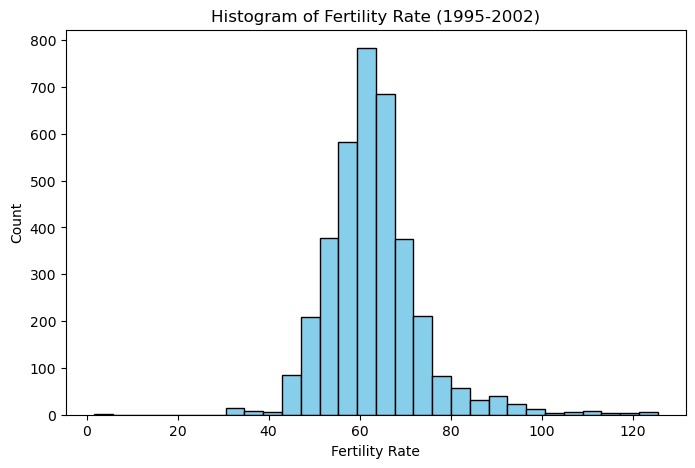

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gfr_1995_2002_df['fertility_rate'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fertility Rate (1995-2002)')
plt.xlabel('Fertility Rate')
plt.ylabel('Count')
plt.show()


In [ ]:
# Filter this data to only 1995
gfr_1995_wonder_df = gfr_1995_2002_df[gfr_1995_2002_df['year'] == '1995']
gfr_1995_wonder_df.head()


,notes,county,county_fips,year,births,gfr_women_pop,fertility_rate
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0,57.432177
8,NaN,"Jefferson County, AL",01073,1995,9372,155228.0,60.375705
16,NaN,"Madison County, AL",01089,1995,3846,63342.0,60.718007
24,NaN,"Mobile County, AL",01097,1995,6093,92128.0,66.136245
32,NaN,"Montgomery County, AL",01101,1995,3514,53740.0,65.38891


In [119]:
# Calculate the average fertility_rate in gfr_1995_wonder_df
avg_fertility_rate = gfr_1995_wonder_df['fertility_rate'].mean()
print(f"Average fertility_rate in gfr_1995_wonder_df: {avg_fertility_rate}")


Average fertility_rate in gfr_1995_wonder_df: 62.50240477881268


## Putting together data for years 1995-2012 only ##

In [244]:
gfr_1995_2012.to_parquet("datastore/output/gfr_1995_2012.parquet", index=False)

## Now computing for years 1968-1994 ##

**Already computed births by county year in explore_natality.ipynb and saved it as a parquet. Bringing that in:**

In [7]:
births_by_county_year = pd.read_parquet('datastore/output/nvss/agg_births_by_county_year.parquet')

**Bring in the population data**

In [11]:
gfr_women_pop_1969_2023_df = pd.read_csv('datastore/output/seer_population/gfr_women_pop_1969-2023.csv')

In [ ]:
gfr_women_pop_1969_2023_df['county_fips'] = gfr_women_pop_1969_2023_df['county_fips'].astype(str).str.zfill(5)

**Get birth and pop dataframe column names and types to match**

In [21]:
births_by_county_year = births_by_county_year.rename(columns={'datayear': 'year', 'fipsco': 'county_fips'})


In [25]:
gfr_women_pop_1969_2023_df['year'] = gfr_women_pop_1969_2023_df['year'].astype(str)

In [63]:
births_by_county_year['year'].unique()

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003'], dtype=object)

In [28]:
gfr_1968_1995_df = pd.merge(
    births_by_county_year[['year', 'county_fips', 'births']],
    gfr_women_pop_1969_2023_df,
    how='left',
    left_on=['year', 'county_fips'],
    right_on=['year', 'county_fips']
)

In [29]:
gfr_1969_1995_df = gfr_1968_1995_df[gfr_1968_1995_df['year'] != '1968']

In [32]:
gfr_1969_1995_df.drop(columns=['fips_county_suffix'], errors='ignore').head()

,year,county_fips,births,gfr_women_pop
3119,1969,01001,442,4941.0
3120,1969,01019,222,3049.0
3121,1969,01021,452,4704.0
3122,1969,01023,384,3262.0
3123,1969,01025,636,5316.0


In [34]:
gfr_1969_1995 = gfr_1969_1995_df.copy()
gfr_1969_1995['gfr'] = (gfr_1969_1995['births'] / gfr_1969_1995['gfr_women_pop']) * 1000


In [36]:
gfr_1969_1995 = gfr_1969_1995.drop(columns=['fips_county_suffix'], errors='ignore')
gfr_1969_1995.head()

,year,county_fips,births,gfr_women_pop,gfr
3119,1969,01001,442,4941.0,89.455576
3120,1969,01019,222,3049.0,72.810758
3121,1969,01021,452,4704.0,96.088435
3122,1969,01023,384,3262.0,117.719191
3123,1969,01025,636,5316.0,119.638826


In [ ]:
share_above_100 = (gfr_1969_1995['gfr'] > 100).mean()
print(f"Share above 100: {share_above_100:.2%}")

Share above 100: 7.83%


In [45]:
# Calculate the share of GFRs > 100 by year
gfr_1969_1995['year_int'] = gfr_1969_1995['year'].astype(int)
share_gfr_above_100_by_year = (
    gfr_1969_1995
    .groupby('year_int')
    .apply(lambda df: (df['gfr'] > 100).mean())
    .sort_index()
)

for year, share in share_gfr_above_100_by_year.items():
    print(f"Year {year}: Share of GFRs > 100 = {share:.2%}")


Year 1969: Share of GFRs > 100 = 21.02%
Year 1970: Share of GFRs > 100 = 23.24%
Year 1971: Share of GFRs > 100 = 18.12%
Year 1972: Share of GFRs > 100 = 10.45%
Year 1973: Share of GFRs > 100 = 7.66%
Year 1974: Share of GFRs > 100 = 7.37%
Year 1975: Share of GFRs > 100 = 7.16%
Year 1976: Share of GFRs > 100 = 6.58%
Year 1977: Share of GFRs > 100 = 7.96%
Year 1978: Share of GFRs > 100 = 7.09%
Year 1979: Share of GFRs > 100 = 8.05%
Year 1980: Share of GFRs > 100 = 9.10%
Year 1981: Share of GFRs > 100 = 9.46%
Year 1982: Share of GFRs > 100 = 8.27%
Year 1983: Share of GFRs > 100 = 5.87%
Year 1984: Share of GFRs > 100 = 4.12%
Year 1985: Share of GFRs > 100 = 3.67%
Year 1986: Share of GFRs > 100 = 2.65%
Year 1987: Share of GFRs > 100 = 1.88%
Year 1988: Share of GFRs > 100 = 2.11%
Year 1989: Share of GFRs > 100 = 1.29%
Year 1990: Share of GFRs > 100 = 2.15%
Year 1991: Share of GFRs > 100 = 1.50%
Year 1992: Share of GFRs > 100 = 2.15%
Year 1993: Share of GFRs > 100 = 1.29%
Year 1994: Share of G

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_6840/1881000920.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['gfr'] > 100).mean())


In [66]:
gfr_1969_1995 = gfr_1969_1995.drop(columns=['year_int'], errors='ignore')


In [67]:
gfr_1969_1995.head()

,year,county_fips,births,gfr_women_pop,gfr
3119,1969,01001,442,4941.0,89.455576
3120,1969,01019,222,3049.0,72.810758
3121,1969,01021,452,4704.0,96.088435
3122,1969,01023,384,3262.0,117.719191
3123,1969,01025,636,5316.0,119.638826


In [69]:
gfr_1969_1995.to_parquet("datastore/output/gfr_1969_1995.parquet", index=False)


## Checking that my birth calculations are right using 1995 (where I have one version from microdata, one from CDC wonder) ##

In [5]:
gfr_1969_1995 = pd.read_parquet("datastore/output/gfr_1969_1995.parquet")
gfr_1995_2012 = pd.read_parquet("datastore/output/gfr_1995_2012.parquet")


In [6]:
calculated_gfr_1995 = gfr_1969_1995[gfr_1969_1995['year'] == '1995']

In [7]:
using_births_1995 = gfr_1995_2012[gfr_1995_2012['year'] == '1995']

In [12]:
calculated_gfr_1995.rename(columns={'gfr': 'gfr_calculated', 'births': 'births_calculated'}, inplace=True)
calculated_gfr_1995.head()

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_9150/1130374517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calculated_gfr_1995.rename(columns={'gfr': 'gfr_calculated', 'births': 'births_calculated'}, inplace=True)


,year,county_fips,births_calculated,gfr_women_pop,gfr_calculated
65453,1995,01073,9372,155228.0,60.375705
65454,1995,01089,3846,63342.0,60.718007
65455,1995,01097,6093,92128.0,66.136245
65456,1995,01101,3514,53740.0,65.388910
65457,1995,01103,1438,23886.0,60.202629


In [13]:
using_births_1995 = using_births_1995.rename(columns={'fertility_rate': 'gfr'})
using_births_1995.head()

,notes,county,county_fips,year,births,gfr_women_pop,gfr
0,None,"Calhoun County, AL",01015,1995,1520.0,26466.0,57.432177
8,None,"Jefferson County, AL",01073,1995,9372.0,155228.0,60.375705
16,None,"Madison County, AL",01089,1995,3846.0,63342.0,60.718007
24,None,"Mobile County, AL",01097,1995,6093.0,92128.0,66.136245
32,None,"Montgomery County, AL",01101,1995,3514.0,53740.0,65.38891


In [15]:
check_1995 = pd.merge(
    calculated_gfr_1995,
    using_births_1995[['year', 'county_fips', 'gfr', 'births']],
    on=['year', 'county_fips'],
    how='inner',
    suffixes=('_calculated', '_using_births')
)
check_1995.head()


,year,county_fips,births_calculated,gfr_women_pop,gfr_calculated,gfr,births
0,1995,01073,9372,155228.0,60.375705,60.375705,9372.0
1,1995,01089,3846,63342.0,60.718007,60.718007,3846.0
2,1995,01097,6093,92128.0,66.136245,66.136245,6093.0
3,1995,01101,3514,53740.0,65.388910,65.38891,3514.0
4,1995,01103,1438,23886.0,60.202629,60.202629,1438.0


In [16]:
share_not_equal = (check_1995['gfr_calculated'] != check_1995['gfr']).mean()
share_not_equal


np.float64(0.0)

**They are exactly the same!**

## Now putting it all together so I have gfrs for the regression ##

In [3]:
gfr_1969_1995 = pd.read_parquet("datastore/output/gfr_1969_1995.parquet")
gfr_1995_2012 = pd.read_parquet("datastore/output/gfr_1995_2012.parquet")

**Preparing to do the merge**

In [4]:
gfr_1969_1995 = gfr_1969_1995.drop(columns=['births', 'gfr_women_pop'])

In [5]:
gfr_1995_2012 = gfr_1995_2012.rename(columns={'fertility_rate': 'gfr'}) \
    .drop(columns=['notes', 'county', 'births', 'gfr_women_pop'])

The 1995 gfrs are identical (zero discrepancies) between the two dataframes so let's just take from gfr_1995_2012 for that year

In [6]:
gfr_1969_1994 = gfr_1969_1995[gfr_1969_1995['year'] != '1995']


In [7]:
gfr_1969_1994.head()

,year,county_fips,gfr
0,1969,01001,89.455576
1,1969,01019,72.810758
2,1969,01021,96.088435
3,1969,01023,117.719191
4,1969,01025,119.638826


In [8]:
gfr_1995_2012.head()

,county_fips,year,gfr
0,01015,1995,57.432177
1,01015,1996,62.062671
2,01015,1997,60.666259
3,01015,1998,63.774921
4,01015,1999,63.450152


In [9]:
gfr_for_regression = pd.concat([gfr_1969_1994, gfr_1995_2012], ignore_index=True)


In [10]:
gfr_for_regression.head()

,year,county_fips,gfr
0,1969,01001,89.455576
1,1969,01019,72.810758
2,1969,01021,96.088435
3,1969,01023,117.719191
4,1969,01025,119.638826


In [12]:
np.sort(gfr_for_regression['year'].unique())

array(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', 'nan'], dtype=object)

In [15]:
gfr_for_regression.to_parquet("datastore/output/gfr_1969_2012.parquet", index=False)